# L'utilisation de la Library de deep learning **Keras** en python pour construire notre CNN (Convolutional Neural Network).

# Deep Learning Librairies

In [150]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
import keras.optimizers as ko

# Tensorflow backend

In [151]:
import tensorflow as tf

In [152]:
import keras.backend as k

In [153]:
data_dir = 'data'
N_train = 1000
N_val = 400

In [154]:
img_width = 150
img_height = 150

# Définition du réseau

In [155]:
model = Sequential()

# 1 : Convolution

In [156]:
# Importation Conv2D de keras.layers, 
# ceci pour effectuer l'opération de convolution, 
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), data_format="channels_last"))
model.add(Activation('relu'))

# 2 : Pooling

In [157]:
#importation MaxPooling2D de keras.layers, qui est utilisé pour l'opération de pooling
# Nous utilisons une fonction de Maxpool
model.add(MaxPooling2D(pool_size=(2, 2)))

In [158]:
model.add(kl.Conv2D(32, (3, 3)))
model.add(kl.Activation('relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))

# 3 : Flattening

In [159]:
# Importation Flatten de keras.layers, qui est utilisé pour 
#  la conversion de tous les tableaux bidimensionnels résultants en un seul vecteur.
model.add(Flatten())

# 4 : Full connection

In [160]:
# Importation Dense de keras.layers, qui est utilisé pour effectuer "the full connection of the neural network"
model.add(Dense(64,name='first', input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,name='second'))
model.add(Activation('sigmoid'))

# model.summary 

In [161]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
activation_127 (Activation)  (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_128 (Activation)  (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 41472)             0         
__________


# Compilation

In [164]:
model.compile(loss='binary_crossentropy',
optimizer=ko.RMSprop(),
metrics=['accuracy'])

In [163]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Configuration pour le training

In [165]:
import keras.preprocessing.image as kpi
train_datagen = kpi.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Configuration pour la validation

In [166]:
valid_datagen = kpi.ImageDataGenerator(rescale=1./255)

In [167]:
#Nous divisons l'ensemble d'entraînement en batchs, 
#chaque epochs passe par tout l'ensemble d'entraînement.
#Chaque itération passe par batch.
batch_size = 100 # 800/100
epochs = 50

In [168]:
#Un générateur qui va lire les images trouvées dans 'data / train'
train_generator = train_datagen.flow_from_directory(
        data_dir+"/train/",  #le répertoire
        target_size=(img_width, img_height), #toutes les images seront redimensionnées à 150x150
        batch_size=batch_size,
        class_mode='binary',
        classes=['cats','dogs'])

Found 2000 images belonging to 2 classes.


In [169]:
# Un générateur similaire, pour les données de validation
validation_generator = valid_datagen.flow_from_directory(
        data_dir+"/validation/",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 800 images belonging to 2 classes.


# fit_generator

In [170]:
model.fit_generator(train_generator,
                    steps_per_epoch=N_train// batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=N_val// batch_size)
###################################
model.save('data\\model\\models_convolutional_network_%d_epochs_%d_batch_size.h5' %(epochs, batch_size))

Epoch 1/50
10/10 [==============================] - 61s 6s/step - loss: 1.5950 - acc: 0.5310 - val_loss: 0.6878 - val_acc: 0.5475
Epoch 2/50
10/10 [==============================] - 42s 4s/step - loss: 0.6925 - acc: 0.5100 - val_loss: 0.6626 - val_acc: 0.5400
Epoch 3/50
10/10 [==============================] - 47s 5s/step - loss: 0.6625 - acc: 0.5840 - val_loss: 0.6427 - val_acc: 0.5525
Epoch 4/50
10/10 [==============================] - 44s 4s/step - loss: 0.6762 - acc: 0.6010 - val_loss: 0.6468 - val_acc: 0.6850
Epoch 5/50
10/10 [==============================] - 45s 5s/step - loss: 0.6535 - acc: 0.6010 - val_loss: 0.6351 - val_acc: 0.6200
Epoch 6/50
10/10 [==============================] - 41s 4s/step - loss: 0.6362 - acc: 0.6460 - val_loss: 0.6307 - val_acc: 0.6750
Epoch 7/50
10/10 [==============================] - 45s 4s/step - loss: 0.6738 - acc: 0.6140 - val_loss: 0.6600 - val_acc: 0.6175
Epoch 8/50
10/10 [==============================] - 43s 4s/step - loss: 0.6324 - acc: 0.65

# Prédiction

In [171]:
score_conv_train = model.evaluate_generator(train_generator, N_train// batch_size)
score_conv_val = model.evaluate_generator(validation_generator, N_val //batch_size)


print('Train accuracy:', score_conv_train[1])
print('Test accuracy:', score_conv_val[1])

Train accuracy: 0.8379999876022339
Test accuracy: 0.7799999862909317


# Prédiction de notre modèle formé:

Dog  [[1.]]


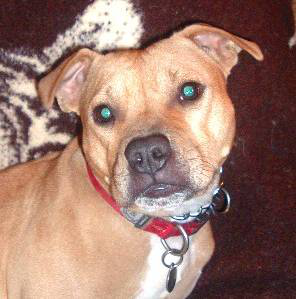

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import keras.preprocessing.image as kpi
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

test_model = load_model('data\\model\\models_convolutional_network_%d_epochs_%d_batch_size.h5' %(epochs, batch_size))
image='img_test/2.jpg'
img = load_img(image,False,target_size=(img_width,img_height))
x1 = img_to_array(img)
x = np.expand_dims(x1, axis=0)

preds = test_model.predict_classes(x)
probs = test_model.predict_proba(x)
if(preds == 0):
    print("Cat ",probs)
if(preds == 1):
    print("Dog ",probs)
kpi.load_img(image)

In [15]:
#fit_generator(self, generator, steps_per_epoch=None,epochs=1, verbose=1, callbacks=None,validation_data=None, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)

a = model.predict_generator(train_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
a

array([[0.4838731 ],
       [0.5006337 ],
       [0.46920896],
       ...,
       [0.486258  ],
       [0.44625363],
       [0.47998008]], dtype=float32)

# Réseau pré-entrainé : VGG16